# ------------------------------
# Title: Economic Data Analysis - China
# ------------------------------

**(a) Import data into Python**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
df = pd.read_csv('/content/China datasheet.csv')

**(b) Head, tail, shape, columns, dtypes, describe**

In [7]:
print("Head:\n", df.head())
print("\nTail:\n", df.tail())
print("\nShape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

Head:
    Year Agricultural land (% of land area)  \
0  1990                        53.86456475   
1  1991                        54.47010891   
2  1992                        54.78273374   
3  1993                        55.19910526   
4  1994                         55.6901446   

  Birth rate, crude (per 1,000 people)  Current account balance (% of GDP)  \
0                                21.06                            3.324577   
1                                19.68                            3.461900   
2                                18.27                            1.499359   
3                                18.09                           -2.610340   
4                                 17.7                            1.224124   

  Current health expenditure (% of GDP) Death rate, crude (per 1,000 people)  \
0                                    ..                                 6.67   
1                                    ..                                  6.7   
2      

**(c) Describe selected columns**

In [8]:
cols_c = [
    'GDP growth (annual %)',
    'Inflation, consumer prices (annual %)',
    'Inflation, GDP deflator (annual %)',
    'Population growth (annual %)'
]
print("Describe Selected Columns:\n", df[cols_c].describe())

Describe Selected Columns:
        GDP growth (annual %)  Inflation, consumer prices (annual %)  \
count              34.000000                              34.000000   
mean                8.797740                               3.758165   
std                 2.924949                               5.273113   
min                 2.238638                              -1.401473   
25%                 7.137438                               1.204959   
50%                 8.811862                               2.247106   
75%                10.094724                               3.757649   
max                14.230861                              24.256990   

       Inflation, GDP deflator (annual %)  Population growth (annual %)  
count                           34.000000                     34.000000  
mean                             4.431467                      0.682266  
std                              4.813159                      0.363090  
min                             -1.2

**(d) Histogram, Boxplot, Density Curve**

<ipython-input-9-14923db307c7>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


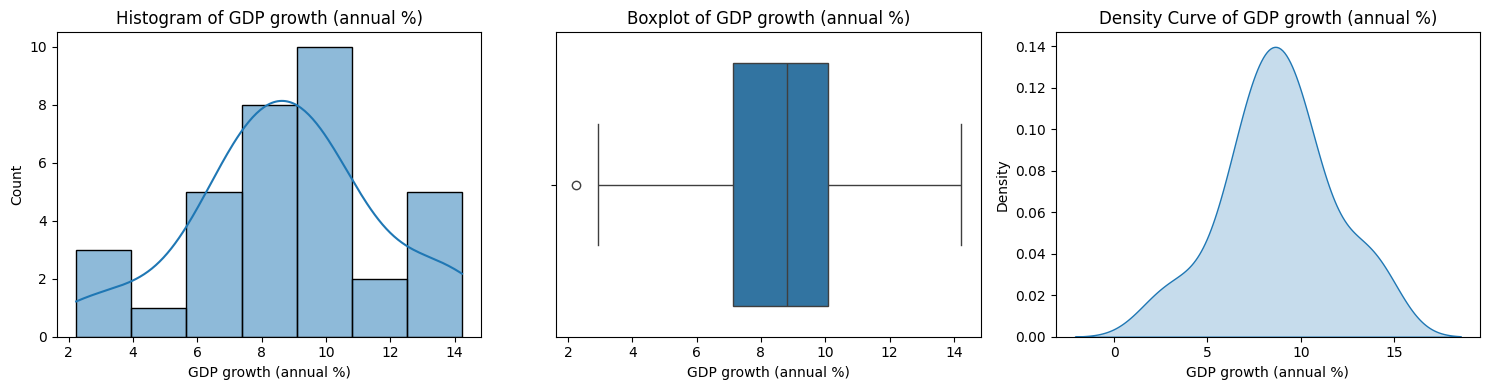

<ipython-input-9-14923db307c7>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


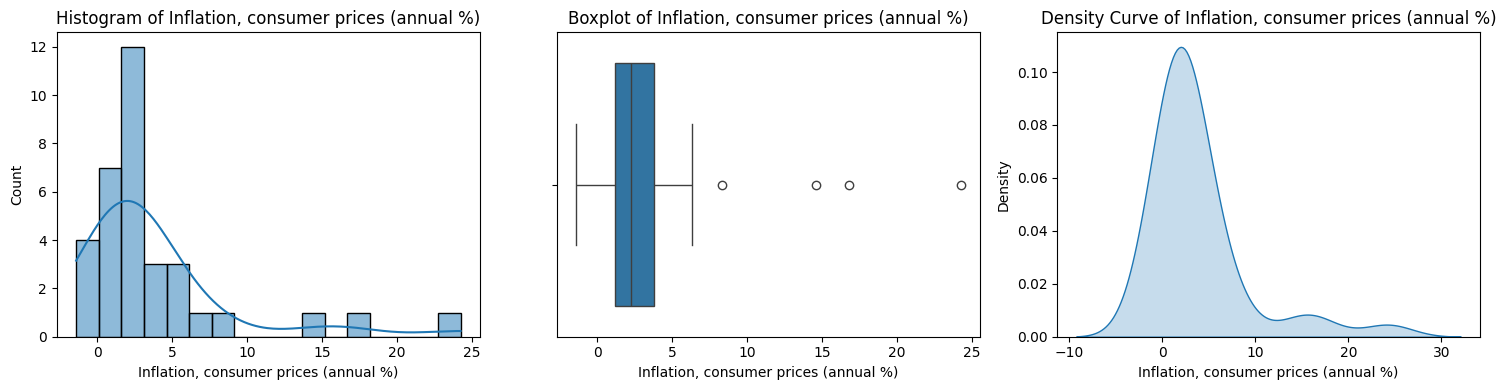

<ipython-input-9-14923db307c7>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


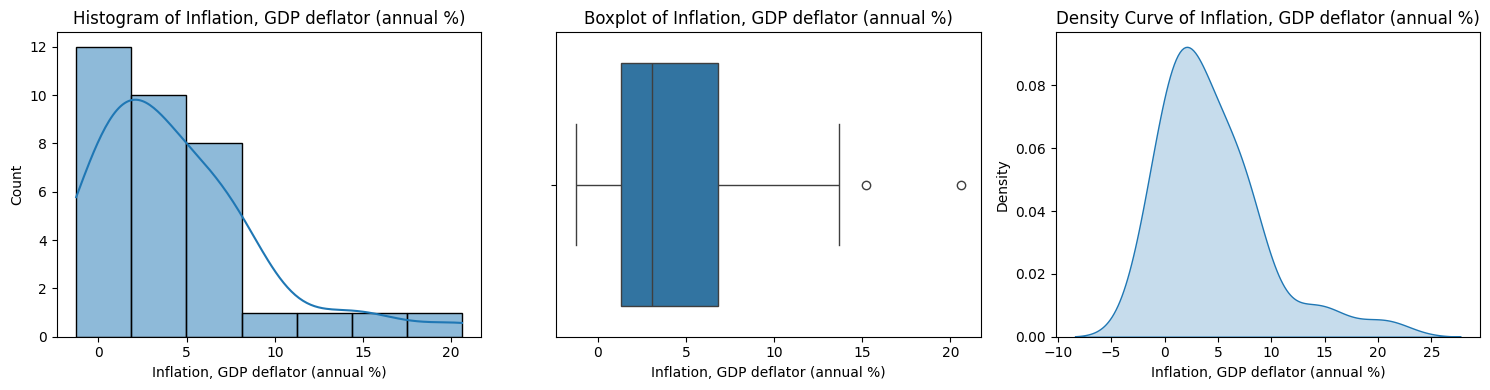

<ipython-input-9-14923db307c7>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


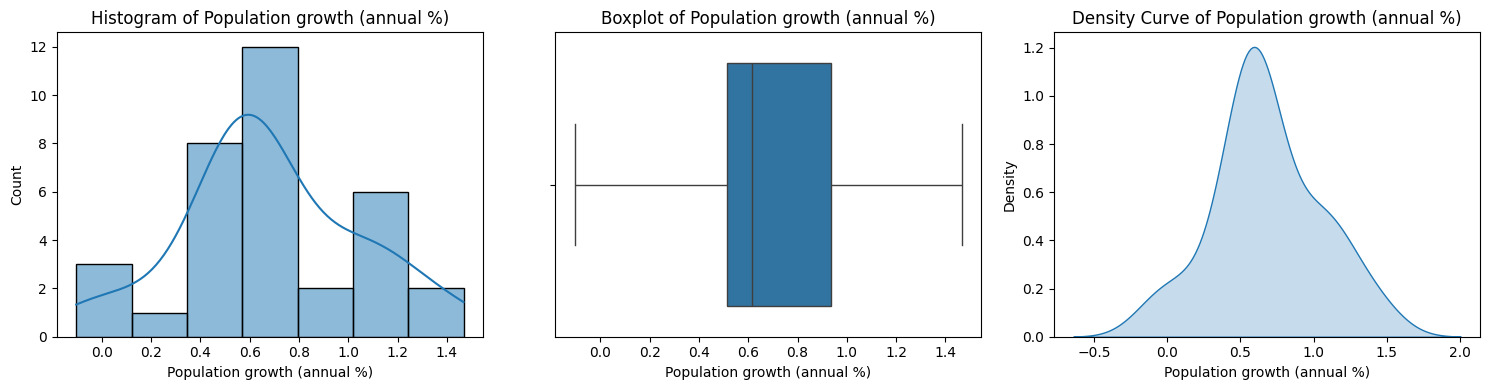

In [9]:
for col in cols_c:
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density Curve of {col}')

    plt.tight_layout()
    plt.show()

**(e) Test Null: Avg Inflation = Avg GDP growth**

In [10]:
# T-test: Are means of Inflation, consumer prices and GDP growth equal?
group1 = df['Inflation, consumer prices (annual %)'].dropna()
group2 = df['GDP growth (annual %)'].dropna()

print("Mean Inflation:", group1.mean())
print("Mean GDP Growth:", group2.mean())

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("\nT-Test Result:\nT-statistic =", t_stat, ", P-value =", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null: Means may be equal.")

Mean Inflation: 3.7581646549705883
Mean GDP Growth: 8.797740447441177

T-Test Result:
T-statistic = -4.873211549934413 , P-value = 1.0881926962557656e-05
Reject null hypothesis: Means are significantly different.


**(f) Test Null: All 4 variable means equal (ANOVA)**

In [11]:
group_data = [df[col].dropna() for col in cols_c]
means = [g.mean() for g in group_data]
print("Means of Variables:\n", dict(zip(cols_c, means)))

f_stat, p_value = stats.f_oneway(*group_data)
print("\nANOVA Result:\nF-statistic =", f_stat, ", P-value =", p_value)

if p_value < 0.05:
    print("Reject null: At least one group mean differs.")
else:
    print("Fail to reject null: All group means may be equal.")

Means of Variables:
 {'GDP growth (annual %)': np.float64(8.797740447441177), 'Inflation, consumer prices (annual %)': np.float64(3.7581646549705883), 'Inflation, GDP deflator (annual %)': np.float64(4.4314670245), 'Population growth (annual %)': np.float64(0.6822662429705882)}

ANOVA Result:
F-statistic = 25.51139572086075 , P-value = 4.4125335997043356e-13
Reject null: At least one group mean differs.


**(g) Scatter plots**

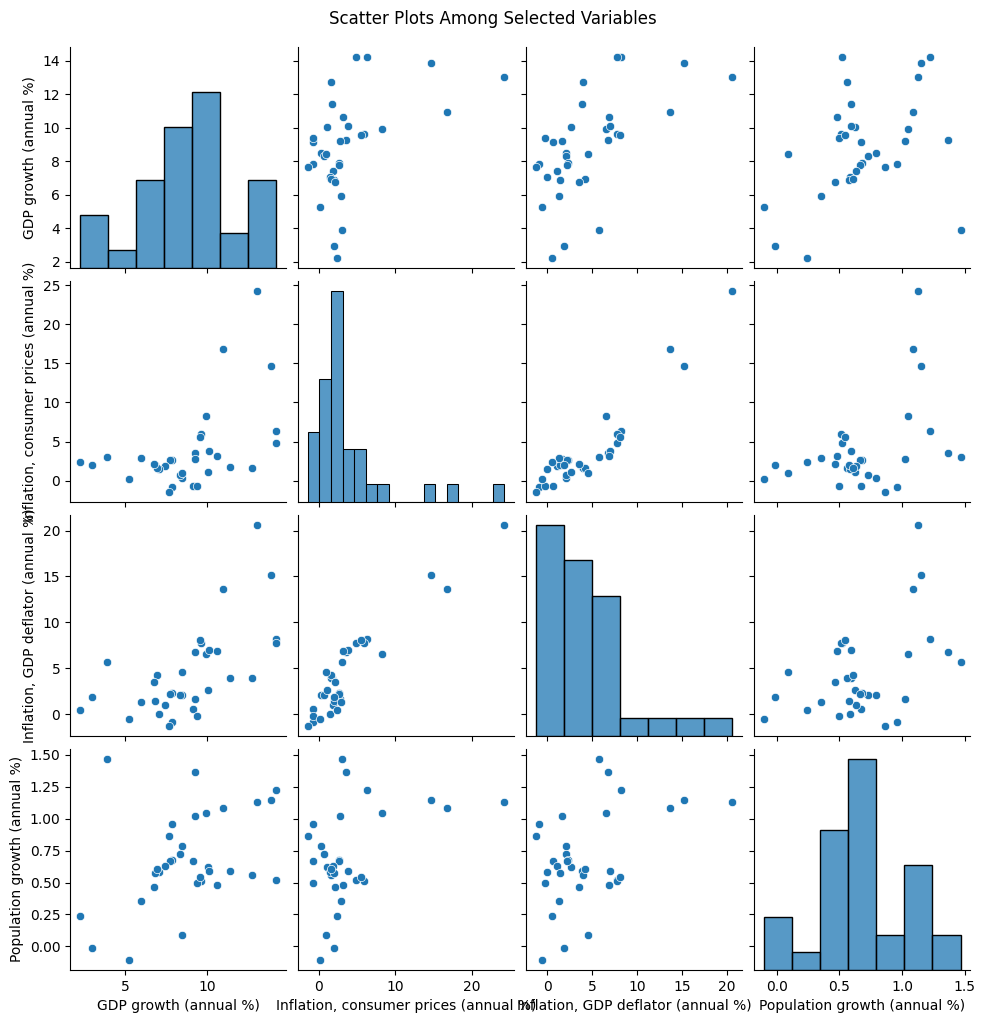

In [12]:
sns.pairplot(df[cols_c])
plt.suptitle("Scatter Plots Among Selected Variables", y=1.02)
plt.show()

**(h) Correlation & Covariance**

In [13]:
print("Correlation Matrix:\n", df[cols_c].corr())
print("\nCovariance Matrix:\n", df[cols_c].cov())

Correlation Matrix:
                                        GDP growth (annual %)  \
GDP growth (annual %)                               1.000000   
Inflation, consumer prices (annual %)               0.485050   
Inflation, GDP deflator (annual %)                  0.618597   
Population growth (annual %)                        0.401564   

                                       Inflation, consumer prices (annual %)  \
GDP growth (annual %)                                               0.485050   
Inflation, consumer prices (annual %)                               1.000000   
Inflation, GDP deflator (annual %)                                  0.929009   
Population growth (annual %)                                        0.432118   

                                       Inflation, GDP deflator (annual %)  \
GDP growth (annual %)                                            0.618597   
Inflation, consumer prices (annual %)                            0.929009   
Inflation, GDP deflator (a

**(i) Trend Analysis – Exports & Imports**

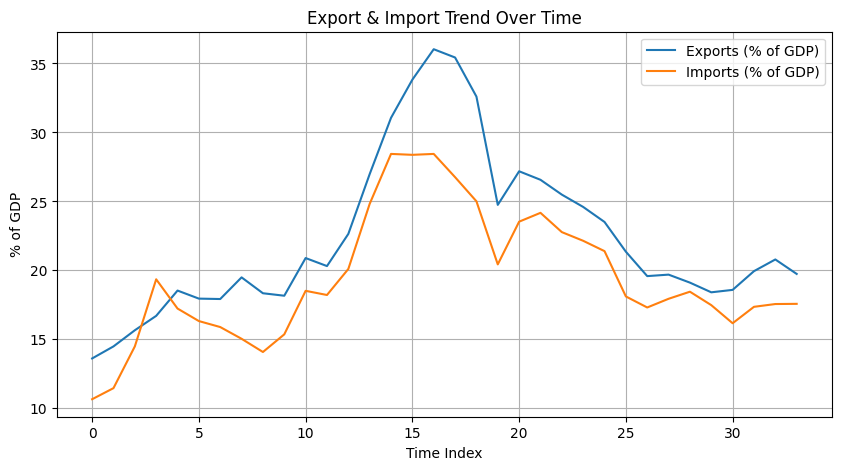

In [14]:
export_col = 'Exports of goods and services (% of GDP)'
import_col = 'Imports of goods and services (% of GDP)'

plt.figure(figsize=(10, 5))
plt.plot(df[export_col], label='Exports (% of GDP)')
plt.plot(df[import_col], label='Imports (% of GDP)')
plt.title('Export & Import Trend Over Time')
plt.xlabel('Time Index')
plt.ylabel('% of GDP')
plt.legend()
plt.grid(True)
plt.show()

**(j) CO2 Emissions – Descriptive Stats, Trend**

CO2 Emissions Stats:
 count       34.000000
mean      7269.481688
std       3746.786115
min       2414.279800
25%       3466.435800
50%       7253.717400
75%      10801.823225
max      13259.639000
Name: Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e), dtype: float64


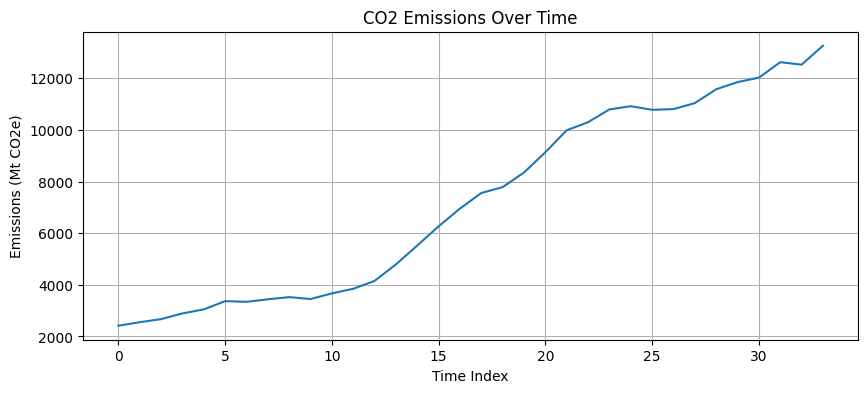

In [15]:
co2_col = 'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)'
print("CO2 Emissions Stats:\n", df[co2_col].describe())

plt.figure(figsize=(10, 4))
plt.plot(df[co2_col])
plt.title("CO2 Emissions Over Time")
plt.xlabel("Time Index")
plt.ylabel("Emissions (Mt CO2e)")
plt.grid(True)
plt.show()

**(k) Create new DataFrame**

In [16]:
selected_cols_k = [
    'Population growth (annual %)',
    'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
    'GDP growth (annual %)',
    'Manufacturing, value added (% of GDP)',
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'Gross capital formation (% of GDP)',
    'Inflation, consumer prices (annual %)'
]

df_k = df[selected_cols_k].copy()
print("New DataFrame:\n", df_k.head())

New DataFrame:
    Population growth (annual %)  \
0                      1.467303   
1                      1.364434   
2                      1.225536   
3                      1.149619   
4                      1.130261   

   Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)  \
0                                          2414.2798                   
1                                          2550.1993                   
2                                          2669.7809                   
3                                          2890.2011                   
4                                          3046.9517                   

   GDP growth (annual %) Manufacturing, value added (% of GDP)  \
0               3.920251                                    ..   
1               9.262786                                    ..   
2              14.224530                                    ..   
3              13.883729                                    ..   
4         

**(l) Build Regression Models**

In [18]:
# Replace '..' strings with NaN and convert columns to numeric
df_cleaned = df_k.replace('..', np.nan)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Split into features and target
X = df_cleaned.drop('GDP growth (annual %)', axis=1)
y = df_cleaned['GDP growth (annual %)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, preds)
    print(f'{name}:\n  R² Score: {r2:.4f}\n  MSE: {mse:.4f}\n')

Linear Regression:
  R² Score: -2.6831
  MSE: 15.2626

Decision Tree:
  R² Score: -1.0862
  MSE: 8.6452

Random Forest:
  R² Score: -0.3979
  MSE: 5.7927

Gradient Boosting:
  R² Score: -0.8310
  MSE: 7.5876

